In [381]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [382]:
df = pd.read_csv('titanic_train.csv')

In [383]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1,E8,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5,C106,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8,NaN,S
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7,C118,C


In [384]:
df.shape

(891, 12)

In [385]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [386]:
df.drop(['PassengerId','Cabin','Name','Ticket'], axis=1, inplace=True)

In [387]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [388]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'].fillna('S',inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_5960\774003622.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace = True)


In [389]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
690,1,1,male,31.000000,1,0,57.0000,S
78,1,2,male,0.830000,0,2,29.0000,S
648,0,3,male,29.699118,0,0,7.5500,S
464,0,3,male,29.699118,0,0,8.0500,S
712,1,1,male,48.000000,1,0,52.0000,S
169,0,3,male,28.000000,0,0,56.4958,S
585,1,1,female,18.000000,0,2,79.6500,S
477,0,3,male,29.000000,1,0,7.0458,S
118,0,1,male,24.000000,0,1,247.5208,C
622,1,3,male,20.000000,1,1,15.7417,C


In [390]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [391]:
len(df[df['Age'] > 74])


1

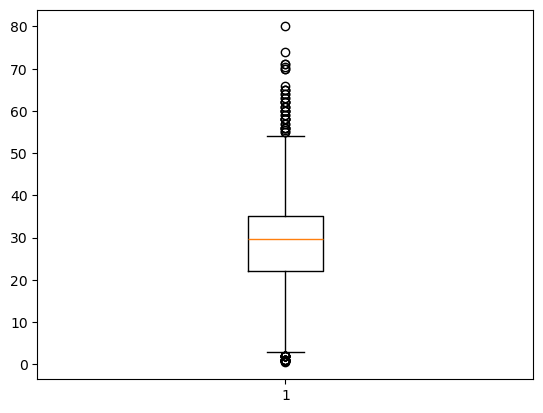

In [392]:
plt.boxplot(df['Age']);

In [393]:
upper_limit = df['Age'].quantile(0.95)
lower_limit = df['Age'].quantile(0.05)

df['Age'] = np.clip(df['Age'], lower_limit, upper_limit)

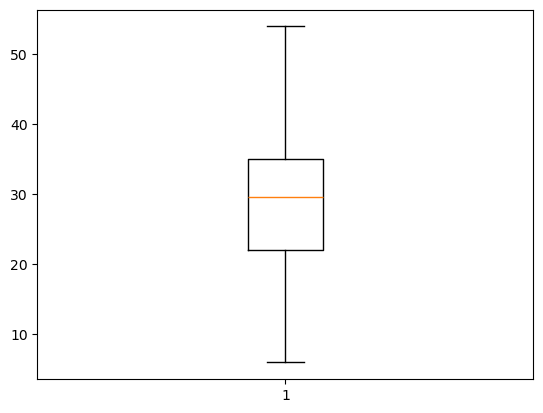

In [394]:
plt.boxplot(df['Age']);

In [395]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [396]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

s_scaler = StandardScaler()
l_encoder = LabelEncoder()

feature_scaling = ['Age', 'Fare']
df[feature_scaling] = s_scaler.fit_transform(df[feature_scaling])


df['Sex'] = l_encoder.fit_transform(df['Sex'])


ohe = OneHotEncoder(sparse_output=False)  # `sparse_output=False` to get a dense array

# Fit and transform 'Embarked' column, and make sure to pass it as a 2D array (DataFrame with double brackets)
encoded_embarked = ohe.fit_transform(df[['Embarked']])

# Convert the result to a DataFrame with appropriate column names
encoded_embarked_df = pd.DataFrame(encoded_embarked, columns=ohe.get_feature_names_out(['Embarked']))

# Concatenate the new DataFrame with the original one
df = pd.concat([df, encoded_embarked_df], axis=1)

# Optionally, drop the original 'Embarked' column now that it’s been encoded
df.drop(columns=['Embarked'], inplace=True)

In [397]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
631,0,3,1,1.836712,0,0,-0.506388,0.0,0.0,1.0
539,1,1,0,-0.640099,0,2,0.348245,1.0,0.0,0.0
292,0,2,1,0.555603,0,0,-0.389188,1.0,0.0,0.0
21,1,2,1,0.384789,0,0,-0.386671,0.0,0.0,1.0
90,0,3,1,-0.042248,0,0,-0.486337,0.0,0.0,1.0


In [398]:
correlation = df.corr()['Survived'].sort_values(ascending=False)
print(correlation)

Survived      1.000000
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.060180
Embarked_S   -0.149683
Pclass       -0.338481
Sex          -0.543351
Name: Survived, dtype: float64


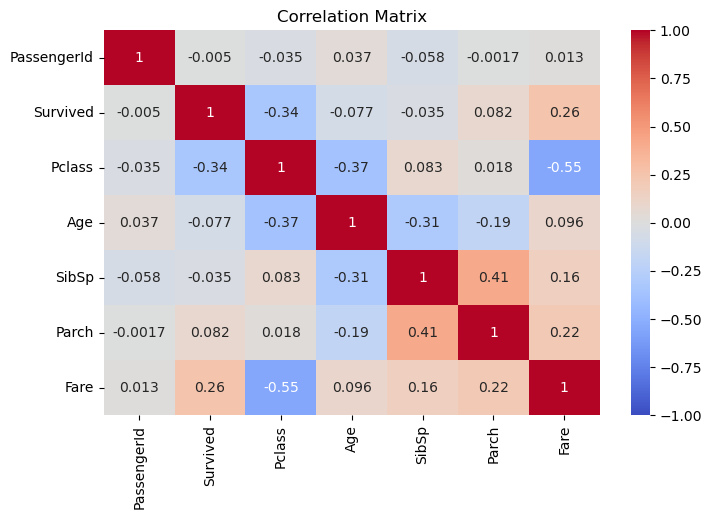

In [399]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap with column names
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            xticklabels=numeric_df.columns, yticklabels=numeric_df.columns)
plt.title("Correlation Matrix")
plt.show()

In [400]:
X = df.drop(['Survived'], axis =1)
y = df['Survived']
from sklearn.feature_selection import mutual_info_classif

# Assuming `y` is the target and `X` is the DataFrame with features
mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info, index=X.columns)
mutual_info.sort_values(ascending=False, inplace=True)
print(mutual_info)

Sex           0.153112
Fare          0.141392
Pclass        0.080608
Embarked_C    0.017934
Age           0.017347
Embarked_S    0.009383
Parch         0.007209
SibSp         0.005291
Embarked_Q    0.003265
dtype: float64


In [401]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived'], axis =1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [402]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8444444444444444


In [427]:
df2 = pd.read_csv('titanic_test.csv')

In [428]:
df3 = df2.drop(['PassengerId','Cabin','Name','Ticket'], axis=1)

In [429]:
df3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [430]:
df3['Age'] = df3['Age'].fillna(df3['Age'].mean())
df3['Fare'] = df3['Fare'].fillna(df3['Fare'].mean())


In [431]:
df3.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [432]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

s_scaler = StandardScaler()
l_encoder = LabelEncoder()

feature_scaling = ['Age', 'Fare']
df3[feature_scaling] = s_scaler.fit_transform(df3[feature_scaling])


df3['Sex'] = l_encoder.fit_transform(df3['Sex'])


ohe = OneHotEncoder(sparse_output=False)  # `sparse_output=False` to get a dense array

# Fit and transform 'Embarked' column, and make sure to pass it as a 2D array (DataFrame with double brackets)
encoded_embarked = ohe.fit_transform(df3[['Embarked']])

# Convert the result to a DataFrame with appropriate column names
encoded_embarked_df = pd.DataFrame(encoded_embarked, columns=ohe.get_feature_names_out(['Embarked']))

# Concatenate the new DataFrame with the original one
df3 = pd.concat([df3, encoded_embarked_df], axis=1)

# Optionally, drop the original 'Embarked' column now that it’s been encoded
df3.drop(columns=['Embarked'], inplace=True)

In [435]:
y_predicted = model.predict(df3)

In [437]:
submission = pd.DataFrame({'PassengerId': df2['PassengerId'], 'Survived': y_predicted})

In [438]:
submission.to_csv('Final_submission.csv',index=False)